In [1]:
import numpy as np
import networkx as nx
from scipy.special import gammaln
import matplotlib.pyplot as plt
import pdb
import importlib

In [2]:
import optim
import sparsedense as spd

In [3]:
importlib.reload(optim)
importlib.reload(spd)

<module 'sparsedense' from 'C:\\Github\\sparsedense3\\imdb\\sparsedense.py'>

In [4]:
links = np.genfromtxt('imdb.tsv', delimiter='\t', dtype=int)
g = nx.Graph()
g.add_edges_from(links)
net = nx.adjacency_matrix(g).toarray().astype(int)
for i in range(net.shape[0]):
    net[i, i] = 1

In [5]:
alpha0 = 3.
sigma0 = .95
c0 = 25.
lamb0 = 2000.

model = spd.NetworkFull(net, links, alpha=alpha0, sigma=sigma0, c=c0, lamb=lamb0)

In [6]:
model.clique_init()

(846, 2288)


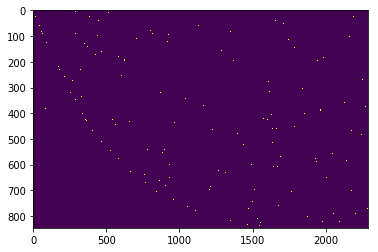

In [7]:
Z = model.Z
print(Z.shape)
plt.imshow(Z, aspect = 'auto')
plt.show()

In [8]:
est_alpha, est_sigma, est_c = optim.optimize_hypers(
    model.Z, model.alpha, model.sigma, model.c, momentum = 0.,
    num_iters = 1000, print_every = 51, h = 1e-8)

iter      0: alpha:      3.000, sigma: 0.950, c:   25.000, ll:  -9570.491, grad:     20.580, -11732.083,     -0.841, step: 2.814749767106563e-05
iter      1: alpha:      3.001, sigma: 0.620, c:   25.000, ll:  -9513.530, grad:    436.901,   3745.812,     19.670, step: 8.466767299456543e-05
iter     52: alpha:      3.609, sigma: 0.806, c:   25.017, ll:  -8967.310, grad:    120.471,   -375.262,      3.274, step: 6.333645628340034e-05
iter    103: alpha:      4.020, sigma: 0.763, c:   25.031, ll:  -8920.363, grad:    107.706,    328.681,      4.400, step: 7.40303706069687e-05
iter    154: alpha:      4.326, sigma: 0.770, c:   25.044, ll:  -8894.477, grad:     59.029,   -214.782,      2.903, step: 6.922390160488346e-05
iter    205: alpha:      4.564, sigma: 0.743, c:   25.057, ll:  -8880.298, grad:     62.367,    224.387,      3.616, step: 8.091186958328388e-05
iter    256: alpha:      4.754, sigma: 0.751, c:   25.069, ll:  -8871.001, grad:     33.492,   -185.441,      2.343, step: 7.565861

In [ ]:
est_alpha, est_sigma, est_c = optim.optimize_hypers(
    model.Z, model.alpha, model.sigma, model.c, momentum = 0.25,
    num_iters = 20000, print_every = 100, h = 1e-4)